# Key Data on Health and Health Care by Race and Ethnicity in 2022

https://www.kff.org/racial-equity-and-health-policy/report/key-data-on-health-and-health-care-by-race-and-ethnicity/

## 1. Project summary


In [479]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Stop scientific notation for pandas
pd.set_option('display.float_format', '{:.2f}'.format)

# Formatting
colors = ["#0076A8", "#62B5E5", "#00A3E0", "#0097A9", "#C4D600", "#43B02A", "#86BC25", "#046A38", "#2C5234"]
my_palette = sns.color_palette(colors)

In [480]:
data = pd.read_csv('NHIS_Adult_Summary_Health_Statistics_20240121.csv')
data

,Outcome (or Indicator),Grouping category,Group,Percentage,Confidence Interval,Title,Description,Year
0,Coronary heart disease,Total,Total,4.60,"4.3, 4.9",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
1,Coronary heart disease,Sex,Male,5.90,"5.5, 6.3",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
2,Coronary heart disease,Sex,Female,3.40,"3.1, 3.7",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
3,Coronary heart disease,Age groups with 65+,18-34 years,0.30,"0.2, 0.5",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
4,Coronary heart disease,Age groups with 65+,35-49 years,0.90,"0.6, 1.2",Percentage of coronary heart disease for adult...,Respondents were asked if they had ever been t...,2019
...,...,...,...,...,...,...,...,...
16107,Any skin cancer,Social vulnerability,Low social vulnerability,3.60,"3.1, 4.1",Percentage of skin cancer for adults aged 18 a...,Respondents were asked if they had ever been t...,2022
16108,Any skin cancer,Social vulnerability,Medium social vulnerability,3.70,"3.3, 4.2",Percentage of skin cancer for adults aged 18 a...,Respondents were asked if they had ever been t...,2022
16109,Any skin cancer,Social vulnerability,High social vulnerability,2.60,"2.2, 2.9",Percentage of skin cancer for adults aged 18 a...,Respondents were asked if they had ever been t...,2022
16110,Any skin cancer,Veteran Status,Veteran,7.80,"6.7, 9.0",Percentage of skin cancer for adults aged 18 a...,Respondents were asked if they had ever been t...,2022


## Racial Diversity

In [481]:
# Load and clean demographic data
demographics = (
    pd.read_csv('2022 American Community Survey 1-Year Estimates.csv', header=1, index_col=[0])
    .replace({",": "", "%": "", "(X)": np.nan}, regex = True)
    .iloc[1:, :]
    .astype(float)
)

# Rename columns
demographics.columns = demographics.columns.str.replace(' alone', '').str.replace('Some Other Race', 'Other race')
demographics.columns = ['Total', 'White', 'Black', 'AIAN', 'Asian', 'NHOPI', 'Other']

demographics

,Total,White,Black,AIAN,Asian,NHOPI,Other
TOTAL NUMBER OF RACES REPORTED,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total population,333287562.00,202889017.00,40603656.00,3205331.00,19696980.00,665807.00,24444482.00
One race,87.50,100.00,100.00,100.00,100.00,100.00,100.00
Two races,11.80,NaN,NaN,NaN,NaN,NaN,NaN
Three races,0.70,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
Median gross rent (dollars),1300.00,1287.00,1167.00,1138.00,1714.00,1557.00,1415.00
COMPUTERS AND INTERNET USE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total households,129870928.00,86507854.00,15698613.00,1037975.00,6792055.00,198120.00,7100710.00
With a computer,95.70,95.70,94.30,93.20,98.20,94.30,95.50


In [482]:
ethnicities = demographics.iloc[1, 2:].reset_index()
ethnicities.columns = ['Ethnicity', 'Count']
ethnicities

# Compute the counts for 'more than one race'
more_than_1_race = demographics.iloc[1, 1] - demographics.iloc[1, 2:].values.sum()
more_than_1_race

# Append the 'more_than_1_race' row to the ethnicities data frame
new_row = pd.DataFrame({'Ethnicity': ['>1 race'], 'Count': [more_than_1_race]}) # new row must be converted to df otherwise -> dict -> cannot be
ethnicities = pd.concat([ethnicities, new_row])
ethnicities

,Ethnicity,Count
0,Black,40603656.00
1,AIAN,3205331.00
2,Asian,19696980.00
3,NHOPI,665807.00
4,Other,24444482.00
0,>1 race,114272761.00


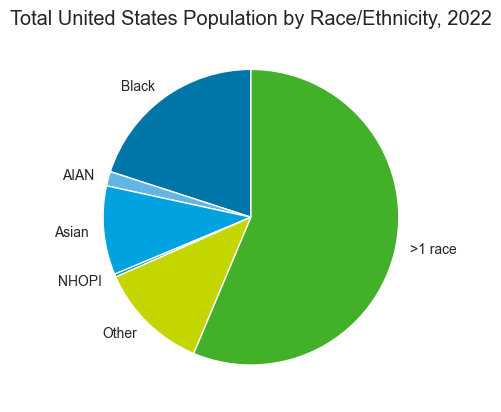

In [483]:
sns.set_style('darkgrid')
sns.set_palette(my_palette)
plt.title('Total United States Population by Race/Ethnicity, 2022')

plt.pie(
    x = ethnicities['Count'],
    labels = ethnicities['Ethnicity'],
    startangle = 90,
    textprops = {'fontsize':10},
);

## Age

In [484]:
age = demographics.loc[['Under 5 years', '5 to 17 years', '18 to 24 years', '25 to 34 years', '35 to 44 years', '45 to 54 years', '55 to 64 years', '65 to 74 years', '75 years and over']]
age # in percentages

,Total,White,Black,AIAN,Asian,NHOPI,Other
Under 5 years,5.50,4.60,6.10,5.80,4.70,6.20,6.70
5 to 17 years,16.20,13.90,17.70,19.70,14.30,19.60,20.50
18 to 24 years,9.40,8.60,10.40,11.70,9.00,10.80,11.50
25 to 34 years,13.60,12.60,15.20,15.50,15.80,16.60,16.00
35 to 44 years,13.20,12.60,13.60,14.40,16.50,14.50,15.30
45 to 54 years,12.10,12.00,12.10,12.50,14.20,12.70,12.90
55 to 64 years,12.60,14.10,11.90,10.50,11.30,10.10,9.20
65 to 74 years,10.20,12.30,8.40,6.60,8.50,6.20,5.10
75 years and over,7.20,9.20,4.70,3.30,5.70,3.30,2.80


<Figure size 2500x600 with 0 Axes>

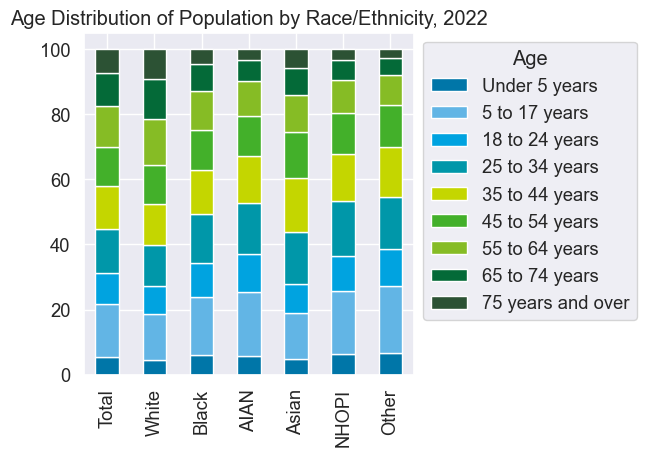

In [505]:
age_plot = age.T

plt.figure(figsize = (25, 6))

age_plot.plot(
    kind = 'bar',
    stacked = True,
    color = sns.set_palette(my_palette))

plt.title("Age Distribution of Population by Race/Ethnicity, 2022")
plt.legend(title = 'Age', bbox_to_anchor = (1, 1), loc = 'upper left')
plt.tight_layout()

In [492]:
age_plot

,Under 5 years,5 to 17 years,18 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 to 74 years,75 years and over
Total,5.50,16.20,9.40,13.60,13.20,12.10,12.60,10.20,7.20
White,4.60,13.90,8.60,12.60,12.60,12.00,14.10,12.30,9.20
Black,6.10,17.70,10.40,15.20,13.60,12.10,11.90,8.40,4.70
AIAN,5.80,19.70,11.70,15.50,14.40,12.50,10.50,6.60,3.30
Asian,4.70,14.30,9.00,15.80,16.50,14.20,11.30,8.50,5.70
NHOPI,6.20,19.60,10.80,16.60,14.50,12.70,10.10,6.20,3.30
Other,6.70,20.50,11.50,16.00,15.30,12.90,9.20,5.10,2.80
